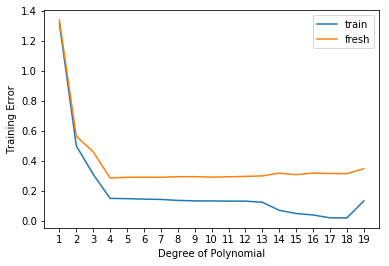

In [32]:
#!/usr/bin/env python3
##HW2-5-(d)

import matplotlib.pyplot as plt
import numpy as np
import scipy.io as spio


# There is numpy.linalg.lstsq, whicn you should use outside of this classs
def lstsq(A, b):
    return np.linalg.solve(A.T @ A, A.T @ b)



def get_X(x_train, D):
    n = x_train.shape[0]
    X = np.ones((n, 1))
    for d in range(1, D+1):
        X = np.hstack((X, x_train.reshape((n, 1))**d))
    return X

def main():
    data = spio.loadmat('1D_poly.mat', squeeze_me=True)
    x_train = np.array(data['x_train'])
    y_train = np.array(data['y_train']).T
    y_fresh = np.array(data['y_fresh']).T

    n = 20  # max degree
    err_train = np.zeros(n - 1)
    err_fresh = np.zeros(n - 1)

    for D in range(1, n):
        X = get_X(x_train, D)
        w = lstsq(X, y_train)
        err_train[D-1] = np.linalg.norm(np.dot(X, w)-y_train)/n
        err_fresh[D-1] = np.linalg.norm(np.dot(X, w)-y_fresh)/n

    plt.figure()
    plt.plot(range(1, n), err_train, label='train')
    plt.plot(range(1, n), err_fresh, label='fresh')
    plt.legend()
    plt.xlabel('Degree of Polynomial')
    plt.ylabel('Training Error')
    plt.xticks(np.arange(1, n, 1.0))
    #plt.ylim([0.25, 0.34])
    plt.show()


if __name__ == "__main__":
    main()


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])